In [ ]:
pip install mlrose

In [1]:
import mlrose as ml
import numpy as np
import time
import matplotlib.pyplot as plt

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
def plot_4_graphs(param, curves, title="", param_name="", curve_name="",l1='RHC',l2='SA', l3='GA', l4='MIMIC'):
    plt.figure()
    y1, = plt.plot(param, curves[0,:],ls='-', marker='+' , color='blue')
    y2, = plt.plot(param, curves[1,:],ls='-', marker='+', color='red')
    y3, = plt.plot(param, curves[2,:], ls='-', marker='+', color='green')
    y4, = plt.plot(param, curves[3,:], ls='-', marker='+', color='yellow')
    
    # plt.xlim(x_range)
    # plt.ylim(y_range)
    plt.xlabel(param_name)
    plt.ylabel(curve_name)
    plt.title=title
    
    plt.legend(handles=[y1,y2,y3,y4],labels=[l1,l2,l3,l4], loc='best')
    
    plt.show()

In [3]:
def plot_graph(param, curves, param_name="", curve_name=""):
    plt.figure()
    plt.plot(param, curves, ls='-', marker='o' , color='blue')
    
    plt.xlabel(param_name)
    plt.ylabel(curve_name)
    
    plt.show()

In [4]:
iter_size = [1,2,3,5,8,10,20,30,50,100,120]
l_iter = len(iter_size)
maxatt_size = [1,2,3,5,8,10,20,30,50,100,120]
l_maxatt = len(maxatt_size)

In [5]:
fitness = ml.FourPeaks(t_pct=0.15)
problem_fit = ml.DiscreteOpt(length=100, fitness_fn=fitness, max_val=2)

In [6]:
geom = ml.GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001)
arith = ml.ArithDecay(init_temp=1.0, decay=0.0001, min_temp=0.001)
exp = ml.ExpDecay(init_temp=1.0, exp_const=0.005, min_temp=0.001)

In [7]:
def rhcAlgo(ft=problem_fit, it=1000, res=0, maxatt=10):
    t0 = time.time()
    best_state, best_fitness, curve = ml.random_hill_climb(ft, max_attempts = maxatt, max_iters=it, restarts=res,
                                                           random_state = 2,curve=True)
    dt = time.time() - t0
    
    perform = np.zeros((1,2))
    perform[0,0] = best_fitness
    perform[0,1] = dt
    return best_fitness, dt

In [8]:
def SA(ft=problem_fit, it=1000, sch=geom, maxatt=10):
    t0 = time.time()
    best_state, best_fitness, curve = ml.simulated_annealing(ft, max_attempts = maxatt, max_iters=it, schedule=sch,
                                                             random_state = 2,curve=True)
    dt = time.time() - t0
    
    perform = np.zeros((1,2))
    perform[0,0] = best_fitness
    perform[0,1] = dt
    return best_fitness, dt

In [9]:
def GA(ft=problem_fit, it=1000, pop=200, mut=0.15, maxatt=10):
    t0 = time.time()
    best_state, best_fitness, curve = ml.genetic_alg(ft, pop_size=pop, mutation_prob=mut, max_attempts=maxatt, 
                                                     max_iters=it, random_state = 2,curve=True)
    dt = time.time() - t0
    
    perform = np.zeros((1,2))
    perform[0,0] = best_fitness
    perform[0,1] = dt
    return best_fitness, dt

In [10]:
def mimicAlgo(ft=problem_fit, it=1000, pop=200, maxatt=10, pct=0.1):
    t0 = time.time()
    best_state, best_fitness, curve = ml.mimic(ft, pop_size=pop, keep_pct=pct, max_attempts=maxatt, max_iters=it, 
                                               random_state = 2,curve=True)
    dt = time.time() - t0
    
    perform = np.zeros((1,2))
    perform[0,0] = best_fitness
    perform[0,1] = dt
    return best_fitness, dt

In [14]:
# comparaison iter size
perfs_4_algo = np.zeros((4, l_iter))
times_4_algo = np.zeros((4, l_iter))
for i in range(l_iter):
    perfs_4_algo[0,i], times_4_algo[0,i] = rhcAlgo(ft=problem_fit, it=iter_size[i], maxatt=100)
    perfs_4_algo[1,i], times_4_algo[1,i] = SA(ft=problem_fit, it=iter_size[i], maxatt=100)
    perfs_4_algo[2,i], times_4_algo[2,i] = GA(ft=problem_fit, it=iter_size[i], maxatt=100)
    perfs_4_algo[3,i], times_4_algo[3,i] = mimicAlgo(ft=problem_fit, it=iter_size[i], maxatt=100)

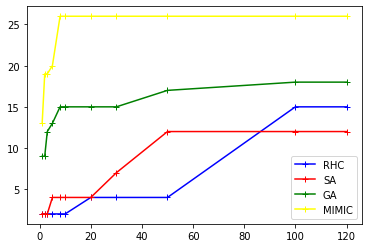

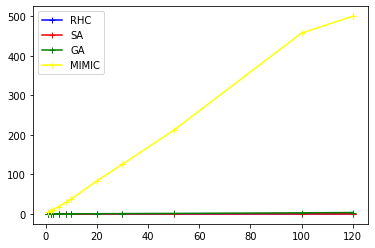

In [15]:
plot_4_graphs(iter_size, perfs_4_algo)
plot_4_graphs(iter_size, times_4_algo)

In [13]:
print(perfs_4_algo)
print(times_4_algo)

[[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  4.  4.  4.  4.  7. 12. 12. 12.]
 [ 9.  9. 12. 13. 15. 15. 15. 15. 15. 15. 15.]
 [13. 19. 19. 20. 26. 26. 26. 26. 26. 26. 26.]]
[[2.68697739e-04 1.18970871e-04 1.39474869e-04 1.80721283e-04
  2.38895416e-04 2.78711319e-04 2.81572342e-04 2.76803970e-04
  2.79903412e-04 2.93731689e-04 2.84910202e-04]
 [1.29222870e-04 1.22785568e-04 1.53303146e-04 2.11000443e-04
  3.07559967e-04 3.73125076e-04 7.09295273e-04 1.02233887e-03
  1.77526474e-03 3.60131264e-03 4.38117981e-03]
 [3.57477665e-02 5.33120632e-02 7.75949955e-02 1.18625879e-01
  1.90222740e-01 2.63120174e-01 3.95027876e-01 3.96919012e-01
  3.93981218e-01 3.98471594e-01 3.95777941e-01]
 [3.74778390e+00 7.97373080e+00 1.09156835e+01 1.81289141e+01
  2.89485192e+01 3.62320535e+01 6.20473859e+01 6.19314983e+01
  6.19639401e+01 6.19438787e+01 6.19931428e+01]]


In [45]:
iter_size_sa = [1,2,3,5,8,10,20,30,50,100,120,200,300,500,1000,2000,3000,5000,8000,10000]
l_iter_sa = len(iter_size_sa)

In [48]:
perfs_sa_it = np.zeros((1, l_iter_sa))
times_sa_it = np.zeros((1, l_iter_sa))
for i in range(l_iter_sa):
    perfs_sa_it[0, i], times_sa_it[0, i] = SA(ft=problem_fit, it=iter_size_sa[i], maxatt=50)

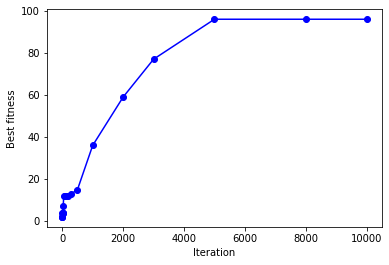

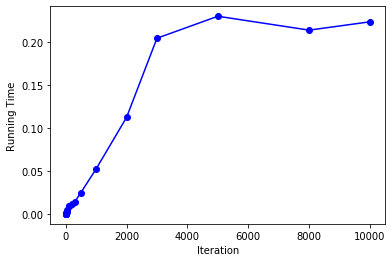

In [49]:
plot_graph(iter_size_sa, perfs_sa_it[0,:], param_name="Iteration", curve_name="Best fitness")
plot_graph(iter_size_sa, times_sa_it[0,:], param_name="Iteration", curve_name="Running Time")

In [14]:
att_size = [10,20,30,50,80,100,150,200,250,300,500]
l_att = len(att_size)

perfs_sa_att = np.zeros((1, l_att))
times_sa_att = np.zeros((1, l_att))
for i in range(l_att):
    perfs_sa_att[0, i], times_sa_att[0, i] = SA(ft=problem_fit, it=2000, maxatt=att_size[i])

/home/sophie/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


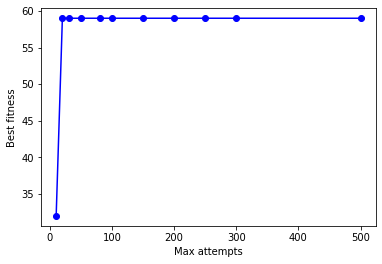

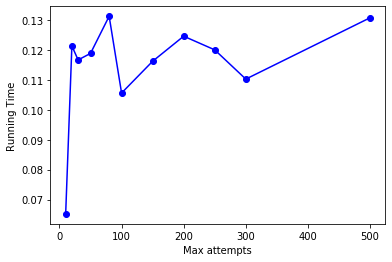

In [15]:
plot_graph(att_size, perfs_sa_att[0,:], param_name="Max attempts", curve_name="Best fitness")
plot_graph(att_size, times_sa_att[0,:], param_name="Max attempts", curve_name="Running Time")

In [33]:
att_size = [10,20,30,50,80,100,150,200,250,300]
l_att = len(att_size)

perfs_sa_att = np.zeros((4, l_att))
times_sa_att = np.zeros((4, l_att))
for i in range(l_att):
    perfs_sa_att[0, i], times_sa_att[0, i] = SA(ft=problem_fit, it=100, maxatt=att_size[i])
    perfs_sa_att[1, i], times_sa_att[1, i] = SA(ft=problem_fit, it=500, maxatt=att_size[i])
    perfs_sa_att[2, i], times_sa_att[2, i] = SA(ft=problem_fit, it=1000, maxatt=att_size[i])
    perfs_sa_att[3, i], times_sa_att[3, i] = SA(ft=problem_fit, it=10000, maxatt=att_size[i])

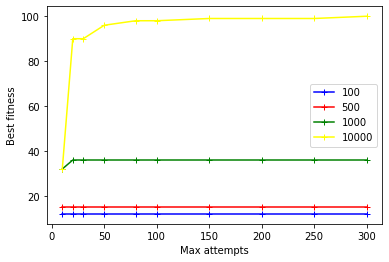

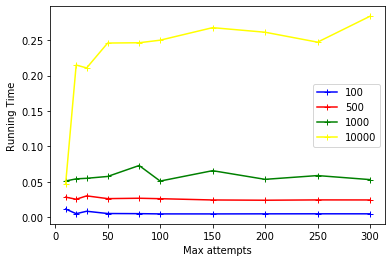

In [34]:
plot_4_graphs(att_size, perfs_sa_att[:,:], param_name="Max attempts", curve_name="Best fitness",l1=100,l2=500,l3=1000,l4=10000)
plot_4_graphs(att_size, times_sa_att[:,:], param_name="Max attempts", curve_name="Running Time",l1=100,l2=500,l3=1000,l4=10000)

In [ ]:
# comparaison iter size
perfs_4_algo_att = np.zeros((4, l_iter))
times_4_algo_att = np.zeros((4, l_iter))
for i in range(l_iter):
    perfs_4_algo_att[0,i], times_4_algo_att[0,i] = rhcAlgo(ft=problem_fit, it=50, maxatt=maxatt_size[i])
    perfs_4_algo_att[1,i], times_4_algo_att[1,i] = SA(ft=problem_fit, it=50, maxatt=maxatt_size[i])
    perfs_4_algo_att[2,i], times_4_algo_att[2,i] = GA(ft=problem_fit, it=50, maxatt=maxatt_size[i])
    perfs_4_algo_att[3,i], times_4_algo_att[3,i] = mimicAlgo(ft=problem_fit, it=50, maxatt=maxatt_size[i])

In [ ]:
plot_4_graphs(maxatt_size, perfs_4_algo_att, param_name="Iterations", curve_name="Best fitness")
plot_4_graphs(maxatt_size, times_4_algo_att, param_name="Iterations", curve_name="Running time")